# FeatureTools

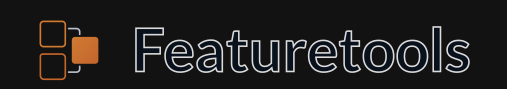

# Step 1: Installing and importing Feature Tools

In [1]:
!pip install featuretools
import featuretools as ft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.1/620.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.0/231.0 kB 10.6 MB/s eta 0:00:00


# Step 2: Loading sample data files

In [2]:
data = ft.demo.load_mock_customer()

In [5]:
data

{'customers':    customer_id zip_code           join_date   birthday
 0            1    60091 2011-04-17 10:48:33 1994-07-18
 1            2    13244 2012-04-15 23:31:04 1986-08-18
 2            3    13244 2011-08-13 15:42:34 2003-11-21
 3            4    60091 2011-04-08 20:08:14 2006-08-15
 4            5    60091 2010-07-17 05:27:50 1984-07-28,
 'sessions':     session_id  customer_id   device       session_start
 0            1            2  desktop 2014-01-01 00:00:00
 1            2            5   mobile 2014-01-01 00:17:20
 2            3            4   mobile 2014-01-01 00:28:10
 3            4            1   mobile 2014-01-01 00:44:25
 4            5            4   mobile 2014-01-01 01:11:30
 5            6            1   tablet 2014-01-01 01:23:25
 6            7            3   tablet 2014-01-01 01:39:40
 7            8            4   tablet 2014-01-01 01:55:55
 8            9            1  desktop 2014-01-01 02:15:25
 9           10            2   tablet 2014-01-01 02:31:40


# Step 3: Defining entity sets and relationship

In [6]:
customers_df = data["customers"]
sessions_df = data["sessions"]
transactions_df = data["transactions"]

In [8]:
sessions_df.head()

,session_id,customer_id,device,session_start
0,1,2,desktop,2014-01-01 00:00:00
1,2,5,mobile,2014-01-01 00:17:20
2,3,4,mobile,2014-01-01 00:28:10
3,4,1,mobile,2014-01-01 00:44:25
4,5,4,mobile,2014-01-01 01:11:30


In [9]:
transactions_df.head()

,transaction_id,session_id,transaction_time,product_id,amount
0,298,1,2014-01-01 00:00:00,5,127.64
1,2,1,2014-01-01 00:01:05,2,109.48
2,308,1,2014-01-01 00:02:10,3,95.06
3,116,1,2014-01-01 00:03:15,4,78.92
4,371,1,2014-01-01 00:04:20,3,31.54


In [7]:
customers_df.head()

,customer_id,zip_code,join_date,birthday
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


## Create EntitySet and Relationship

First, we specify a dictionary with all the DataFrames in our dataset. The DataFrames are passed in with their index column and time index column if one exists for the DataFrame.

In [13]:
dataframes = {
    "customers": (customers_df, "customer_id"),
    "sessions": (sessions_df, "session_id", "session_start"),
    "transactions": (transactions_df, "transaction_id", "transaction_time"),
}

Second, we specify how the DataFrames are related. When two DataFrames have a one-to-many relationship, we call the “one” DataFrame, the “parent DataFrame”. A relationship between a parent and child is defined like this:

In [15]:
# Relationship and Keys

relationships = [
    ("sessions", "session_id", "transactions", "session_id"),
    ("customers", "customer_id", "sessions", "customer_id"),
]


# Step 4: Generating features using deep feature synthesis

In [16]:
feature_matrix_customers, features_defs_cust = ft.dfs(dataframes=dataframes,
                                                 relationships=relationships,
                                                 target_dataframe_name="customers",
)

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. 

In [17]:
feature_matrix_customers

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


# Step 5: Inspecting and selecting relevant features

We now have dozens of new features to describe a customer’s behavior.



In [24]:
feature_matrix_customers.head()

,zip_code,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,mobile,3,126,139.43,71.631905,5.81,4,5,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,13244,7,desktop,3,93,146.81,77.422366,8.73,4,5,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,13244,6,desktop,3,93,149.15,67.060430,5.89,1,5,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,60091,8,mobile,3,109,149.95,80.070459,5.73,2,5,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,60091,6,mobile,3,79,149.02,80.375443,7.55,5,5,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


In [19]:
feature_matrix_sessions, features_defs_sess = ft.dfs(
    dataframes=dataframes, relationships=relationships, target_dataframe_name="sessions"
)

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn(


,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(birthday),customers.DAY(join_date),customers.MONTH(birthday),customers.MONTH(join_date),customers.WEEKDAY(birthday),customers.WEEKDAY(join_date),customers.YEAR(birthday),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


In [25]:
feature_matrix_sessions.head(5)

,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(birthday),customers.DAY(join_date),customers.MONTH(birthday),customers.MONTH(join_date),customers.WEEKDAY(birthday),customers.WEEKDAY(join_date),customers.YEAR(birthday),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


In [29]:
feature_matrix_transactions, features_defs_txn = ft.dfs(
    dataframes=dataframes, relationships=relationships, target_dataframe_name="transactions"
)

/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/featuretools/entityset/entityset.py:754: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn(


In [30]:
feature_matrix_transactions.head()

,session_id,product_id,amount,DAY(transaction_time),MONTH(transaction_time),WEEKDAY(transaction_time),YEAR(transaction_time),sessions.customer_id,sessions.device,sessions.COUNT(transactions),...,sessions.MODE(transactions.product_id),sessions.NUM_UNIQUE(transactions.product_id),sessions.SKEW(transactions.amount),sessions.STD(transactions.amount),sessions.SUM(transactions.amount),sessions.DAY(session_start),sessions.MONTH(session_start),sessions.WEEKDAY(session_start),sessions.YEAR(session_start),sessions.customers.zip_code
transaction_id,,,,,,,,,,,,,,,,,,,,,
298,1,5,127.64,1,1,2,2014,2,desktop,16,...,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244
2,1,2,109.48,1,1,2,2014,2,desktop,16,...,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244
308,1,3,95.06,1,1,2,2014,2,desktop,16,...,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244
116,1,4,78.92,1,1,2,2014,2,desktop,16,...,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244
371,1,3,31.54,1,1,2,2014,2,desktop,16,...,3,5,0.295458,41.600976,1229.01,1,1,2,2014,13244


# Step 6: Understanding the engineered features

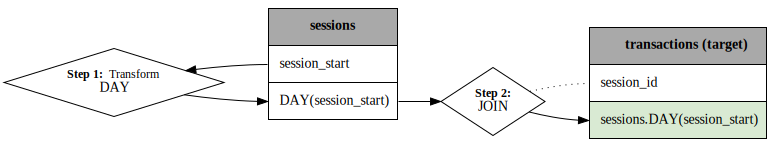

In [32]:
feature = features_defs_txn[18]
ft.graph_feature(feature)

In [33]:
ft.describe_feature(feature)

'The day of the month of the "session_start" for the instance of "sessions" associated with this instance of "transactions".'

# Step 7 - Integrate the Engineered Features into the ML Pipeline

In [ ]:
# Let's do it.